In [1]:
# import libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = (20.0, 10.0)

data = pd.read_csv('headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [2]:
# collecting data in X and Y

X = data['Head Size(cm^3)'].values
# print(X.shape)
Y = data['Brain Weight(grams)'].values

In [3]:
# Calculating theta_0 as b0 and theta_1 as b1

mean_x = np.mean(X)
mean_y = np.mean(Y)

m = len(X)

numer = 0
denom = 0

for i in range(m):
    numer = numer + (X[i]-mean_x)*(Y[i]-mean_y)
    denom = denom + (X[i]-mean_x)**2
b1 = numer/denom
b0 = mean_y - b1*mean_x

print(b1,b0)

0.26342933948939945 325.57342104944223


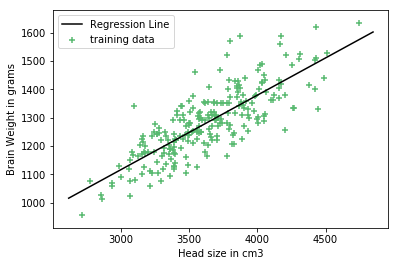

In [4]:
# Plotting data and Regression line

max_x = np.max(X) + 100
min_x = np.min(X) - 100

x = np.linspace(min_x,max_x,1000)
y = b0 + b1*x

plt.plot(x,y,color='k',label='Regression Line')
plt.scatter(X,Y,color='#58b970',marker='+',label='training data')

plt.xlabel('Head size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

In [5]:
# calculating RMSE

rmse = 0 
for i in range(m):
    y_pred = b0 + b1*X[i]
    rmse = rmse + (y_pred - Y[i])**2
rmse = rmse/m
rmse = np.sqrt(rmse)
print(rmse)


72.1206213783709


In [15]:
# calculating R2 value

ss_t = 0
ss_r = 0

for i in range(m):
    y_pred = b0 + b1*X[i]
    ss_t += (Y[i] - mean_y)**2
    ss_r += (Y[i] - y_pred)**2
r2 = 1-(ss_r/ss_t)
print(r2)

[0.63931172]


In [16]:
# using Scikit-Learn to build the model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = X.reshape(m,1)   # as we cannot use rank 1 matrix in scikit learn
reg = LinearRegression()

reg = reg.fit(X,Y)
Y_pred = reg.predict(X)     # X_test in place of X in predict fun 

mse = mean_squared_error(Y,Y_pred)
rmse = np.sqrt(mse)
r2_score = reg.score(X,Y)   

print(rmse)

print(r2_score)


72.1206213783709
0.639311719957
